# Naive Bayes on second dataset

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
import time
import numpy as np 
import pandas as pd 
import pickle


In [2]:
data = pd.read_csv('2.csv')

In [3]:
data.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [4]:
data.drop("Unnamed: 0",inplace=True,axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    6045 non-null   object
 1   Label   6046 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.6+ KB


In [6]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6045 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    6045 non-null   object
 1   Label   6045 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 141.7+ KB


In [7]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6045 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    6045 non-null   object
 1   Label   6045 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 141.7+ KB


In [8]:
x = data["Body"]
x_clnd_link = [re.sub(r"http\S+", "", text) for text in x]

print(x_clnd_link[0])


Save up to 70% on Life Insurance.
Why Spend More Than You Have To?Life Quote Savings
Ensuring your 
      family's financial security is very important. Life Quote Savings makes 
      buying life insurance simple and affordable. We Provide FREE Access to The 
      Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and 
            SAVES you money! Let us help you get started with the best values in 
            the country on new coverage. You can SAVE hundreds or even thousands 
            of dollars by requesting a FREE quote from Lifequote Savings. Our 
            service will take you less than 5 minutes to complete. Shop and 
            compare. SAVE up to 70% on all types of Life insurance! Click Here For Your 
            Free Quote!Protecting your family is the best investment you'll ever 
          make!
If you are in receipt of this email 
      in error and/or wish to be removed from our list, PLEASE CLICK HERE AND TYPE REMOVE. If you 
      resi

In [9]:
pattern = "[^a-zA-Z0-9]"


In [10]:
x_cleaned = [re.sub(pattern," ",text) for text in x_clnd_link]


In [11]:
x_lowered = [text.lower() for text in x_cleaned]
print(x_lowered[0])

 save up to 70  on life insurance  why spend more than you have to life quote savings ensuring your        family s financial security is very important  life quote savings makes        buying life insurance simple and affordable  we provide free access to the        very best companies and the lowest rates life quote savings is fast  easy and              saves you money  let us help you get started with the best values in              the country on new coverage  you can save hundreds or even thousands              of dollars by requesting a free quote from lifequote savings  our              service will take you less than 5 minutes to complete  shop and              compare  save up to 70  on all types of life insurance  click here for your              free quote protecting your family is the best investment you ll ever            make  if you are in receipt of this email        in error and or wish to be removed from our list  please click here and type remove  if you        resi

In [12]:
# import nltk
# nltk.download()

In [13]:
x_tokenized = [nltk.word_tokenize(text) for text in x_lowered]


In [14]:
print(x_tokenized[0])


['save', 'up', 'to', '70', 'on', 'life', 'insurance', 'why', 'spend', 'more', 'than', 'you', 'have', 'to', 'life', 'quote', 'savings', 'ensuring', 'your', 'family', 's', 'financial', 'security', 'is', 'very', 'important', 'life', 'quote', 'savings', 'makes', 'buying', 'life', 'insurance', 'simple', 'and', 'affordable', 'we', 'provide', 'free', 'access', 'to', 'the', 'very', 'best', 'companies', 'and', 'the', 'lowest', 'rates', 'life', 'quote', 'savings', 'is', 'fast', 'easy', 'and', 'saves', 'you', 'money', 'let', 'us', 'help', 'you', 'get', 'started', 'with', 'the', 'best', 'values', 'in', 'the', 'country', 'on', 'new', 'coverage', 'you', 'can', 'save', 'hundreds', 'or', 'even', 'thousands', 'of', 'dollars', 'by', 'requesting', 'a', 'free', 'quote', 'from', 'lifequote', 'savings', 'our', 'service', 'will', 'take', 'you', 'less', 'than', '5', 'minutes', 'to', 'complete', 'shop', 'and', 'compare', 'save', 'up', 'to', '70', 'on', 'all', 'types', 'of', 'life', 'insurance', 'click', 'here'

In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/lakshay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
words = ["bats","removed","cheers","good","stopped","went","fired","cleaner","beers"]
for word in words:
    print(lemma.lemmatize(word),end=" ")

bat removed cheer good stopped went fired cleaner beer 

In [17]:
x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]


In [18]:
print(x_lemmatized[0])


['save', 'up', 'to', '70', 'on', 'life', 'insurance', 'why', 'spend', 'more', 'than', 'you', 'have', 'to', 'life', 'quote', 'saving', 'ensuring', 'your', 'family', 's', 'financial', 'security', 'is', 'very', 'important', 'life', 'quote', 'saving', 'make', 'buying', 'life', 'insurance', 'simple', 'and', 'affordable', 'we', 'provide', 'free', 'access', 'to', 'the', 'very', 'best', 'company', 'and', 'the', 'lowest', 'rate', 'life', 'quote', 'saving', 'is', 'fast', 'easy', 'and', 'save', 'you', 'money', 'let', 'u', 'help', 'you', 'get', 'started', 'with', 'the', 'best', 'value', 'in', 'the', 'country', 'on', 'new', 'coverage', 'you', 'can', 'save', 'hundred', 'or', 'even', 'thousand', 'of', 'dollar', 'by', 'requesting', 'a', 'free', 'quote', 'from', 'lifequote', 'saving', 'our', 'service', 'will', 'take', 'you', 'le', 'than', '5', 'minute', 'to', 'complete', 'shop', 'and', 'compare', 'save', 'up', 'to', '70', 'on', 'all', 'type', 'of', 'life', 'insurance', 'click', 'here', 'for', 'your', '

In [19]:
stopwords = nltk.corpus.stopwords.words("english")
x_prepared = [[word for word in text if word not in stopwords] for text in x_lemmatized]

In [20]:
print(x_prepared[0])


['save', '70', 'life', 'insurance', 'spend', 'life', 'quote', 'saving', 'ensuring', 'family', 'financial', 'security', 'important', 'life', 'quote', 'saving', 'make', 'buying', 'life', 'insurance', 'simple', 'affordable', 'provide', 'free', 'access', 'best', 'company', 'lowest', 'rate', 'life', 'quote', 'saving', 'fast', 'easy', 'save', 'money', 'let', 'u', 'help', 'get', 'started', 'best', 'value', 'country', 'new', 'coverage', 'save', 'hundred', 'even', 'thousand', 'dollar', 'requesting', 'free', 'quote', 'lifequote', 'saving', 'service', 'take', 'le', '5', 'minute', 'complete', 'shop', 'compare', 'save', '70', 'type', 'life', 'insurance', 'click', 'free', 'quote', 'protecting', 'family', 'best', 'investment', 'ever', 'make', 'receipt', 'email', 'error', 'wish', 'removed', 'list', 'please', 'click', 'type', 'remove', 'reside', 'state', 'prohibits', 'e', 'mail', 'solicitation', 'insurance', 'please', 'disregard', 'email']


In [21]:
len(np.unique([word for text in x_prepared for word in text]))


55102

In [22]:
vectorizer = CountVectorizer(max_features=20000)
x = vectorizer.fit_transform([" ".join(text) for text in x_prepared]).toarray()

In [23]:
x.shape


(6045, 20000)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,np.asarray(data["Label"]),random_state=42,test_size=0.2)
x_train.shape

(4836, 20000)

In [25]:
start_time = time.time()
NB = GaussianNB()
NB.fit(x_train,y_train)
end_time = time.time()

print(round(end_time-start_time,2))

2.03


In [26]:
NB.score(x_test,y_test)


0.9106699751861043

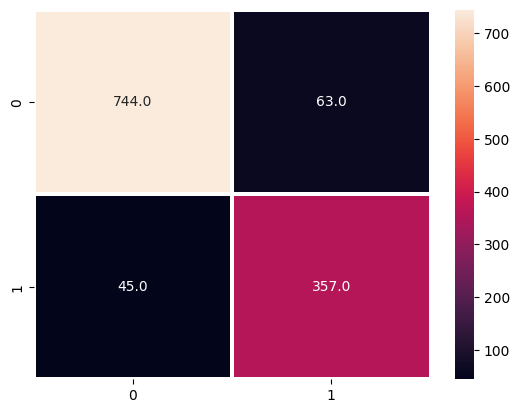

In [27]:
from sklearn.metrics import confusion_matrix
y_pred = NB.predict(x_test)

conf = confusion_matrix(y_pred=y_pred,y_true=y_test)
import seaborn
seaborn.heatmap(conf,annot=True,fmt=".1f",linewidths=1.5)
import matplotlib.pyplot as plt
plt.show()